## Kylie's Code for Matrix Factorization

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split


In [2]:
NUM_PRED = 5

In [3]:
df_songs = pd.read_csv("cleaned_data/csr_df.csv")
df_songs.shape

(15281, 13352)

In [5]:
random_sample = df_songs.sample(axis='columns')
print(random_sample)

       Forget What I Said
0                       0
1                       0
2                       0
3                       0
4                       0
...                   ...
15276                   0
15277                   0
15278                   0
15279                   0
15280                   0

[15281 rows x 1 columns]


In [6]:
songs = df_songs.to_numpy()

#### i think this doesn't do anything?

In [7]:
x,y = songs.reshape((songs.shape[0], songs.shape[1])), range(songs.shape[0])

In [14]:
# Create a new user:
new_user_songs = ['Seven Nation Army', 'Already Dead']
# Create a new user row (all 0s, then set selected songs to 1)
new_user_row = np.zeros(songs.shape[1])
for song in new_user_songs:
    if song in df_songs.columns:
        new_user_row[df_songs.columns.get_loc(song)] = 1

In [17]:
new_user_row

array([0., 0., 0., ..., 0., 0., 0.], shape=(13352,))

In [18]:
list_of_songs = []

In [ ]:
for i in range(5):
    # random seed
    rand = int(random.random()*100)

    # split into test and training data (20, 80)
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=rand)

    # TruncatedSVD is a dimensionality reduction technique (similar to PCA)
    svd = TruncatedSVD(n_components=4, n_iter=7, random_state=rand)

    # fit the training data
    # contains the transformed low-dimensional representation
    train_mat = svd.fit_transform(x_train)

    # dot multiplication of the training matrix and the svd components
    # meaning: reconstructs an approximate version of the original data
    approx_matrix = np.dot(train_mat, svd.components_)

    # Projecting the new user onto the reduced feature space
    new_user_mat = np.dot(new_user_row, svd.components_.T)

    # Reconstructing predictions in the original space
    new_predictions = np.dot(new_user_mat, svd.components_)

    # Sorts indices of predicted ratings in descending order (highest ratings first)
    recommendations = np.argsort(-new_predictions)

    # Selects the top NUM_PRED recommendations
    recommendations = [i for i in recommendations][:NUM_PRED]

    # Mapping indices to song titles
    recommended_songs = [df_songs.columns[i] for i in recommendations]

    print(f"{i+1}. Top Recommendations for New User:")
    print(recommended_songs)
    for song in recommended_songs:
        list_of_songs.append(song)

1. Top Recommendations for New User:
['All Work', 'So Close', 'Juicy', 'In My Arms', 'Nothing Less']
2. Top Recommendations for New User:
['Juicy', 'All Work', 'Nothing Less', 'We Got Love', 'Let Me See It']
3. Top Recommendations for New User:
['Juicy', 'All Work', 'Nothing Less', 'We Got Love', 'Bass']
4. Top Recommendations for New User:
['All Work', 'So Close', 'Juicy', 'In My Arms', 'Nothing Less']
5. Top Recommendations for New User:
['Juicy', 'All Work', 'Nothing Less', 'We Got Love', 'I']


### sorts the song recommendations 

##### set - gets rid of duplicates
##### sorts the songs based on their frequency in list of songs st least frequent appears first

In [21]:
res = sorted(set(list_of_songs), key = lambda ele: list_of_songs.count(ele))
print(list_of_songs)

['All Work', 'So Close', 'Juicy', 'In My Arms', 'Nothing Less', 'Juicy', 'All Work', 'Nothing Less', 'We Got Love', 'Let Me See It', 'Juicy', 'All Work', 'Nothing Less', 'We Got Love', 'Bass', 'All Work', 'So Close', 'Juicy', 'In My Arms', 'Nothing Less', 'Juicy', 'All Work', 'Nothing Less', 'We Got Love', 'I']


In [22]:
top_songs = []

In [23]:
# res = sorted(set(list_of_songs), key = lambda ele: list_of_songs.count(ele))
i = len(res) - 1
while (i > len(res) - NUM_PRED - 1):
    top_songs.append(res[i])
    i = i - 1
print(top_songs)

['Nothing Less', 'Juicy', 'All Work', 'We Got Love', 'In My Arms']


In [24]:
from scipy.spatial.distance import euclidean

# use features dataset for euclidean distance (find songs that have most similar features)

# Euclidean distance to recommend songs based on how close they 
# are to the new user's preferences in latent space

distances = []
for i in range(train_mat.shape[0]):
    dist = euclidean(new_user_mat, train_mat[i])
    distances.append((df_songs.columns[i], dist))

# Sort by smallest distance
closest_songs_euc = sorted(distances, key=lambda x: x[1])[:NUM_PRED]
print("Songs closest to the new user:", [s[0] for s in closest_songs_euc])

Songs closest to the new user: ['Girl On Fire', 'Who Will I Be', 'Blame It on the Boogie', 'Rock And Roll En La Plaza Del Pueblo - Live', 'Hipnosis']


In [25]:
from sklearn.metrics.pairwise import cosine_similarity

# Cosine similarity: 
# Euclidean distance may not work well if the magnitude of vectors is very different, 
# so cosine similarity is often better for recommendation systems

similarities = cosine_similarity(new_user_mat.reshape(1, -1), train_mat)
recommended_indices = np.argsort(-similarities[0])[:NUM_PRED]
recommended_songs_cos = [df_songs.columns[i] for i in recommended_indices]

print("Recommended Songs using Cosine Similarity:", recommended_songs_cos)

Recommended Songs using Cosine Similarity: ['Girl On Fire', 'While My Guitar Gently Weeps', 'Los Malaventurados No Lloran', 'The Advent Of Panurge', 'In My Mind (feat. Georgi Kay) - Axwell Radio Edit']


NameError: name 'plt' is not defined

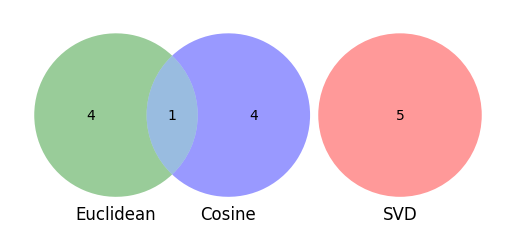

In [28]:
from matplotlib_venn import venn3

# Exploring how similar the outputs from the three methods are (how many recommended songs overlap)

recommended_songs_euc = [song[0] for song in closest_songs_euc]

# Create a Venn diagram
venn3([set(top_songs), set(recommended_songs_euc), set(recommended_songs_cos)], set_labels=('SVD', 'Euclidean', 'Cosine'))
plt.show()

print([set(top_songs)])
print([set(recommended_songs_euc)])
print([set(recommended_songs_cos)])